In [35]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import json
import os
from tqdm import tqdm
from collections import Counter
import numpy as np

In [3]:
DATASET_PATH = "/home/jack/datasets/polish_rap/"

In [4]:
def get_strong_words():
    with open(DATASET_PATH + "strong_language.json", "r") as f:
        return json.load(f)

In [5]:
strongs = set(get_strong_words())

In [6]:
len(strongs)

593

In [17]:
def get_all_strongs():
    rappers_strongs = {}
    strongs_count = Counter()
    rappers = os.listdir(DATASET_PATH + "ok_lyrics/")
    for rapper in rappers:
        songs = os.listdir(DATASET_PATH + "ok_lyrics/" + rapper)
        num_songs = len(songs)
        num_strongs = 0
        for song in songs:
            with open(DATASET_PATH + "ok_lyrics/" + rapper + "/" + song, "r") as f:
                song_text = json.load(f)
            song_words = song_text["lyrics"].split()
            strongs_in_song = list(filter(lambda x: x in strongs, song_words))
            num_strongs += len(strongs_in_song)
            strongs_count += Counter(strongs_in_song)
        rappers_strongs[rapper] = num_strongs/num_songs
    return rappers_strongs, strongs_count

In [18]:
all_rapers_strongs, strongs_count = get_all_strongs()

In [84]:
rappers_df = pd.DataFrame.from_dict(all_rapers_strongs, "index")
rappers_df.sort_values(by=0, inplace=True, ascending=False)

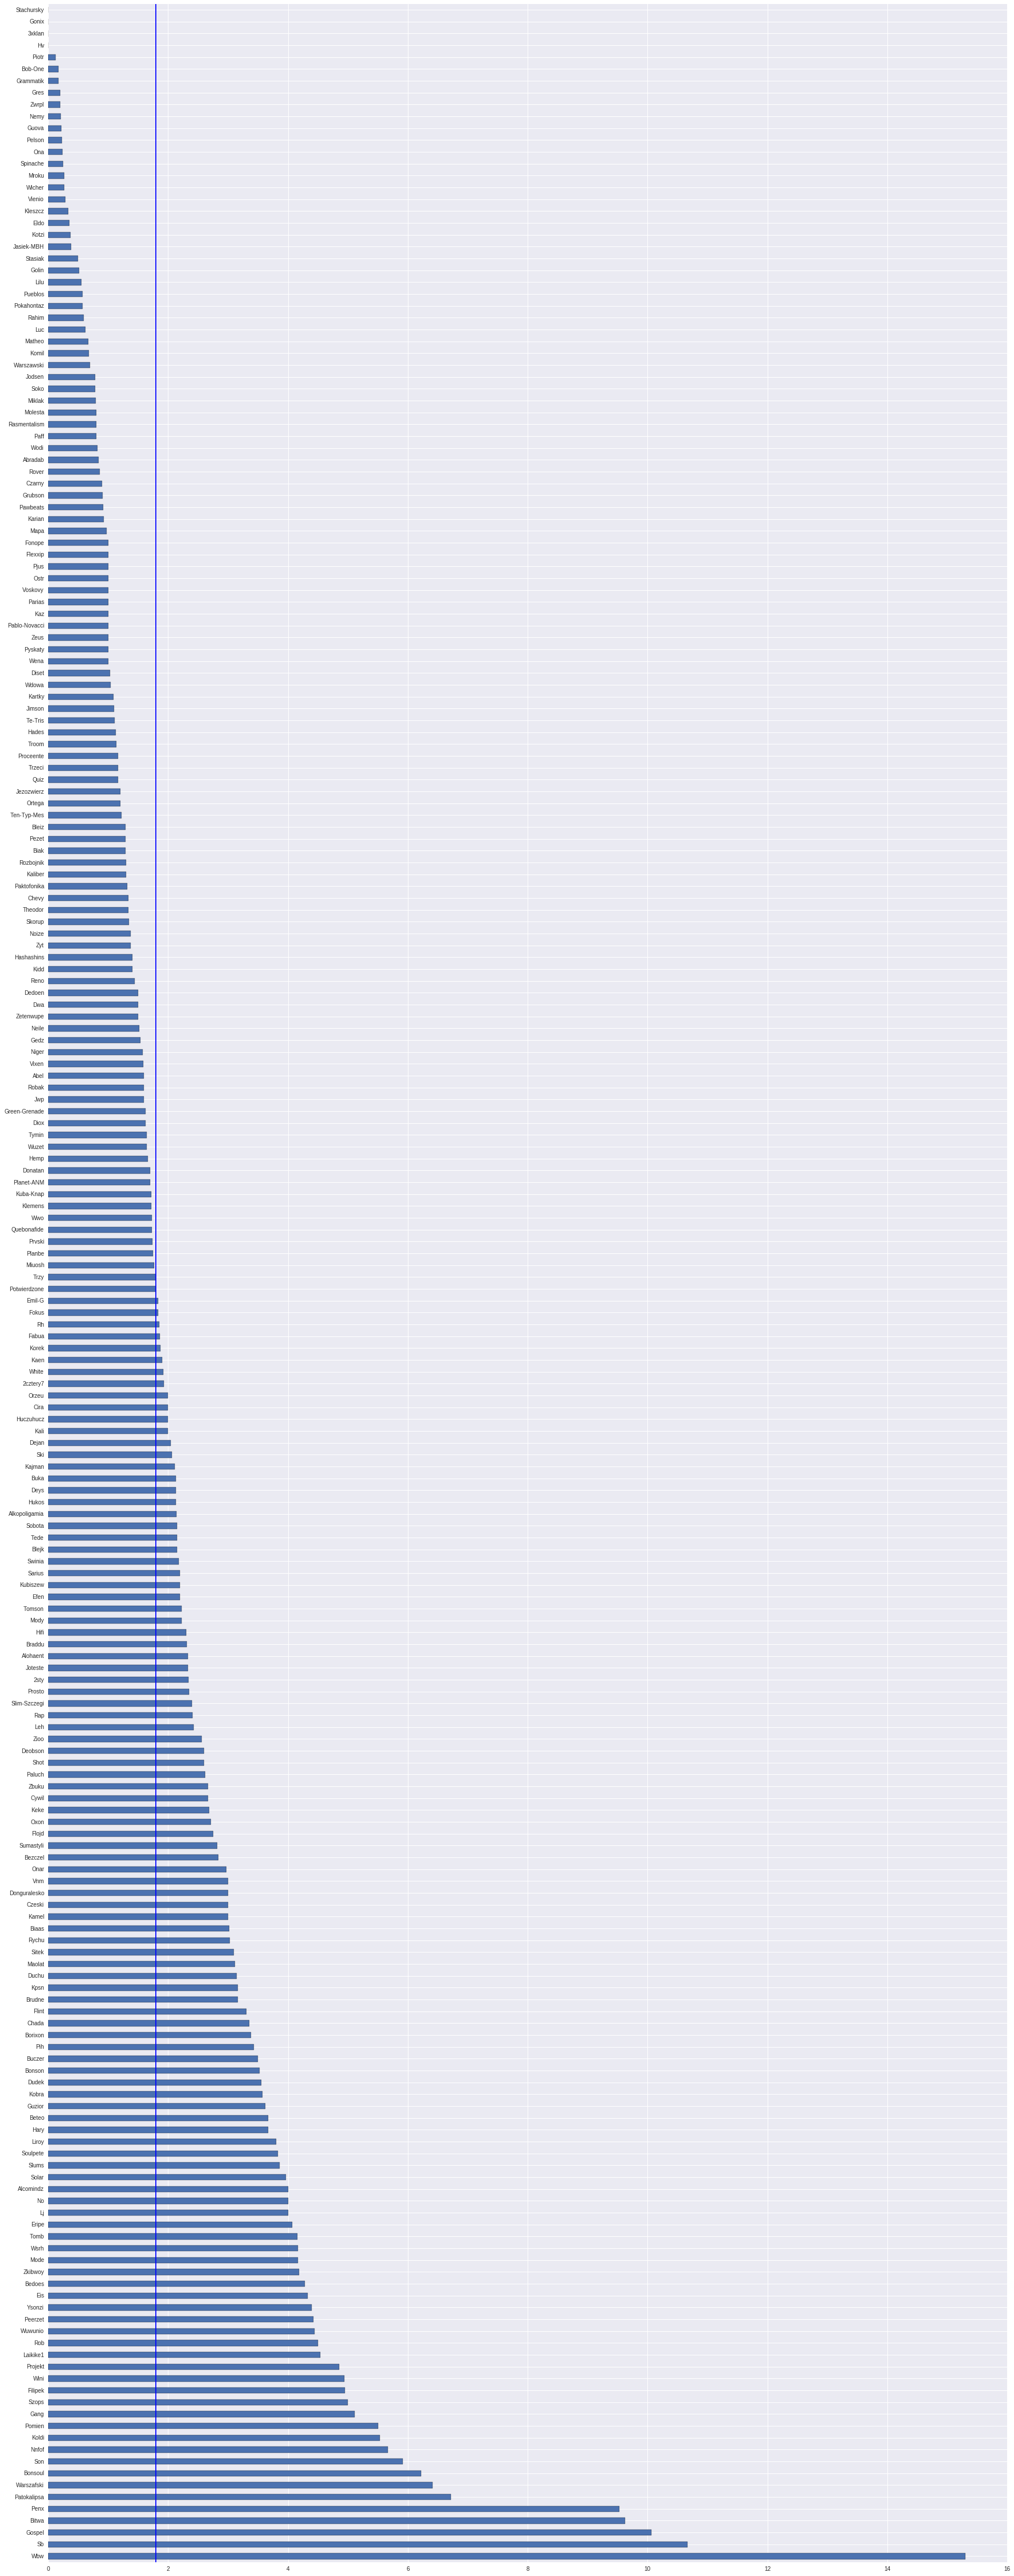

In [85]:
plt.figure()
rappers_df[0].plot(kind="barh", figsize=(30, 80))
plt.axvline(x=float(rappers_df.median(0)))
# strongs_df["median"].plot(kind="line", ax = ax)

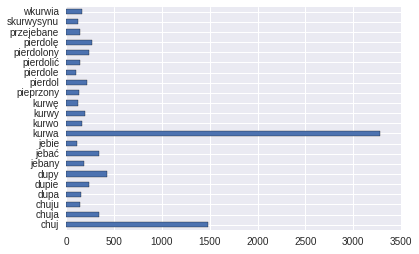

In [94]:
strongs_df = pd.Series(dict(strongs_count))
strongs_df[strongs_df > 100].plot(kind="barh")